# Experiment 3

Preprocessing Techniques -> Grayscale + Histogram Equalization + Contour Detection

## Data Visualization

In [1]:
from helpers import  get_preprocessed_samples, plot_preprocessed_samples

2025-05-09 15:23:36.056319: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-09 15:23:36.072410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746800616.084897  144917 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746800616.088574  144917 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746800616.099871  144917 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

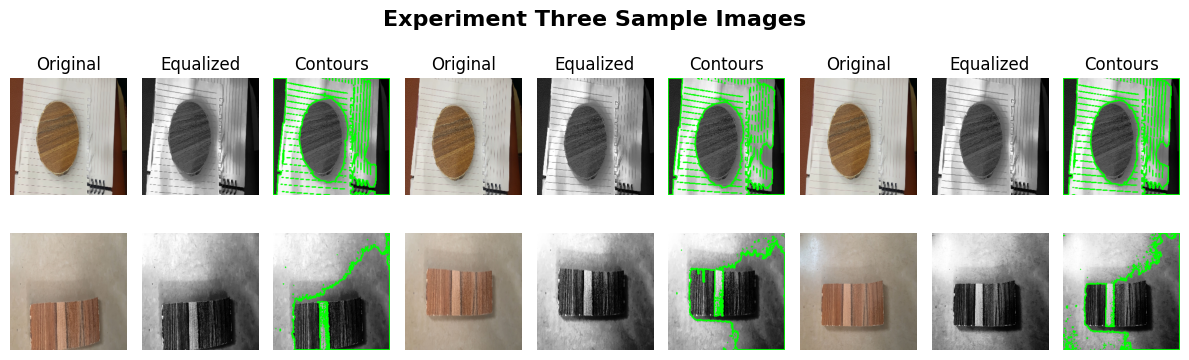

In [ ]:
# We would apply preprocessing on the dataset and then visualize samples
# We are making use of our helper functions...
class_names = ["circle", "rectangle"]

# We are getting samples from the original train dataset
sample_data = get_preprocessed_samples("./dataset/train", class_names)

# Visualizing the extraced sample data
plot_preprocessed_samples(
    class_names,
    sample_data,
    filename="experiment_three_sample_images",
    title="Experiment Three Sample Images"
)

## Data Preprocessing

In [3]:
from helpers import build_feature_dataset

In [ ]:
# We are going to build a custom dataset with extracted features using
# our helper functions
X_train, y_train, class_map = build_feature_dataset("./dataset/train")
X_test, y_test, _ = build_feature_dataset("./dataset/test")

## Model Training

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initializing an SVM model
classifier = SVC(
    kernel="linear",
    C=1,
    gamma="scale",
    random_state=42
)
classifier

SVC(C=1, kernel='linear', random_state=42)

In [32]:
# Training the model on the training set
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

## Model Evaluation

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Generate predictions from the model using the test set
preds = classifier.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, preds)
print("SVM Model Test Accuracy: {:.2f}".format(accuracy))

SVM Model Test Accuracy: 0.87


In [41]:
print("Classification Report:\n\n", classification_report(y_test, preds))

Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.79      0.85       117
           1       0.82      0.93      0.88       121

    accuracy                           0.87       238
   macro avg       0.87      0.86      0.86       238
weighted avg       0.87      0.87      0.86       238



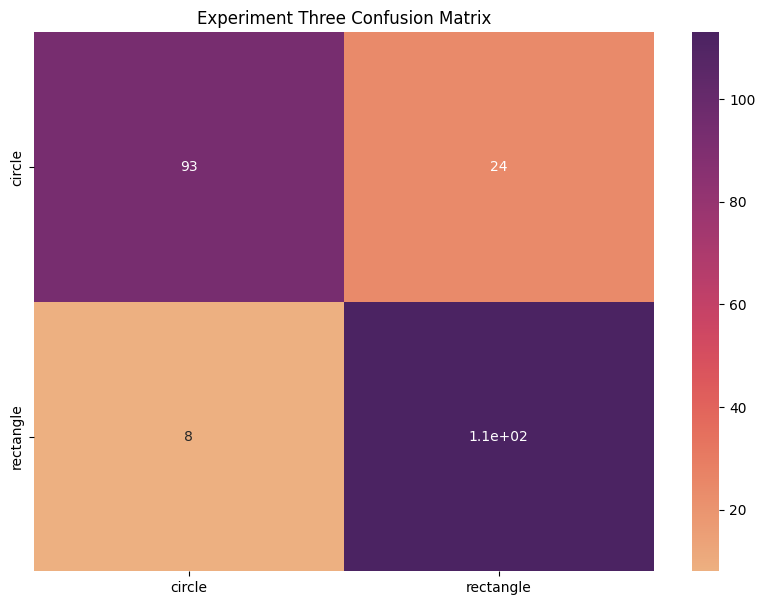

In [45]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 7))
sns.heatmap(
    confusion_matrix(y_test, preds),
    annot=True,
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="flare"
)
plt.title("Experiment Three Confusion Matrix")
plt.savefig("./plots/experiment_three_confusion_matrix")
plt.show()